# Pengenalan

Pada tanggal 15 April 1912, Titanic tenggelam setelah bertabrakan dengan gunung es, menewaskan 1502 dari 2224 penumpang. Tragedi sensasional ini mengejutkan masyarakat internasional dan menyebabkan peraturan keselamatan kapal yang lebih baik.
Salah satu alasan mengapa kapal karam menyebabkan hilangnya nyawa adalah karena tidak tersedianya sekoci yang cukup untuk penumpang dan awak kapal. Meskipun ada beberapa unsur keberuntungan yang terlibat dalam selamat dari tenggelamnya, beberapa kelompok orang lebih mungkin untuk bertahan hidup daripada yang lain, seperti wanita, anak-anak, dan kelas atas.

Dalam penelitian ini, akan menyelesaikan analisis orang seperti apa yang mungkin bertahan dengan menerapkan machine learning untuk memprediksi penumpang mana yang selamat dari tragedi tersebut.

In [1]:
# Data Dictionary

"""Variable Definition Key
survival Survival 0 = No, 1 = Yes
pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
sex Sex 
Age Age in years 
sibsp # of siblings / spouses aboard the Titanic 
parch # of parents / children aboard the Titanic 
ticket Ticket number 
fare Passenger fare 
cabin Cabin number 
embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...

Parent = mother, father
Child = daughter, son, stepdaughter, stepson
"""

'Variable Definition Key\nsurvival Survival 0 = No, 1 = Yes\npclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd\nsex Sex \nAge Age in years \nsibsp # of siblings / spouses aboard the Titanic \nparch # of parents / children aboard the Titanic \nticket Ticket number \nfare Passenger fare \ncabin Cabin number \nembarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton\nVariable Notes\n\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = Middle\n3rd = Lower\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\nsibsp: The dataset defines family relations in this way...\nSibling = brother, sister, stepbrother, stepsister\nSpouse = husband, wife (mistresses and fiancés were ignored)\nparch: The dataset defines family relations in this way...\n\nParent = mother, father\nChild = daughter, son, stepdaughter, stepson\n'

# Import Library

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import math
import statistics
import seaborn as sns

%matplotlib inline
sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Data Loading & Exploratory Data Analysis

In [3]:
#load file data training dan testing
training = pd.read_csv('train.csv') #train
testing = pd.read_csv('test.csv')
training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
testing.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
training.shape

(891, 12)

In [6]:
testing.shape

(418, 11)

In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
testing.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
#Menghapus kolom yang tidak digunakan
training.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)
tst = testing.copy()
testing.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis=1, inplace=True)

training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
training.isnull().sum() #drop / fill mean or modus

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [13]:
testing.isnull().sum() #drop / fill mean or modus

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [14]:
print(training['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


## Handling Missing Value

In [15]:
#Handling Missing Value
training['Age'].fillna(training['Age'].median(), inplace=True) #replace data yang kosong dengan median
testing['Age'].fillna(testing['Age'].median(), inplace=True)

training['Embarked'].fillna('S', inplace=True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)
#null_table(training, testing)

In [16]:
#Mengisi data yang hilang/kosong pada tabel Fare berdasarkan harga kelas tiket
for x in range(len(testing["Fare"])):
    if pd.isnull(testing["Fare"][x]):
        pclass = testing["Pclass"][x] #Pclass = 3
        testing["Fare"][x] = round(training[training["Pclass"] == pclass]["Fare"].mean(), 4)
        
#membuat mapping kolom Fare
training['FareBand'] = pd.qcut(training['Fare'], 4, labels = [1, 2, 3, 4])
testing['FareBand'] = pd.qcut(testing['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare
training = training.drop(['Fare'], axis = 1)
testing = testing.drop(['Fare'], axis = 1)

In [17]:
training.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
FareBand    0
dtype: int64

## Menghapus data duplicated

In [18]:
training.duplicated().sum()

251

In [19]:
testing.duplicated().sum()

91

In [20]:
training.drop_duplicates(inplace=True)
testing.drop_duplicates(inplace=True)

In [21]:
nums = ['Survived','Pclass','Age','SibSp','Parch','FareBand']
cats = ['Sex','Embarked']

In [22]:
print(training['Sex'].value_counts(),'\n')

print(training['Embarked'].value_counts())

male      377
female    263
Name: Sex, dtype: int64 

S    461
C    138
Q     41
Name: Embarked, dtype: int64


# Visualisasi Data 

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


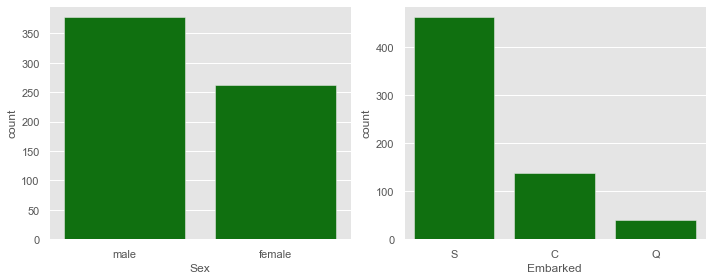

In [23]:
#sns.countplot(training['Sex'], color='green')
feature = cats
plt.figure(figsize=(10,4))
for i in range(0, len(feature)):
  plt.subplot(1, 2, i+1)
  sns.countplot(training[feature[i]], color='green') #harus ada keyword
  plt.tight_layout()

- Lebih banyak penumpang Pria daripada Wanita 
- Penumpang terbanyak berangkat dari Southampton
- Penumpang paling sedikit berada pada kelas Queenstown
- C = Cherbourg, Q = Queenstown, S = Southampton

## Persentase penumpang yang selamat  

In [24]:
training['Survived'].value_counts()

0    354
1    286
Name: Survived, dtype: int64

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

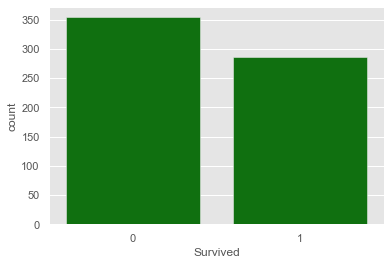

In [25]:
sns.countplot(training['Survived'], color='green')

(-1.1120363468222532,
 1.1271507374055572,
 -1.1100226836129974,
 1.1004773170145676)

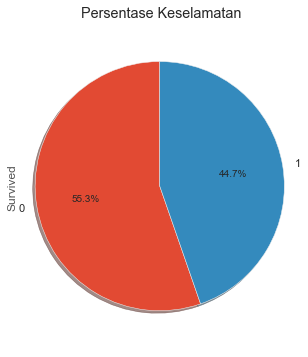

In [26]:
training['Survived'].value_counts().plot(kind='pie', 
                                  figsize=(5,6),
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  shadow=True,)
plt.title('Persentase Keselamatan')
plt.axis('equal')

- Banyak penumpang yang tidak selamat dari kecelakan kapal Titanic
- Penumpang selamat = 342 ( 38.4 %)
- Penumpang tidak selamat = 549 ( 61.6% )

## Distribusi Data setiap features

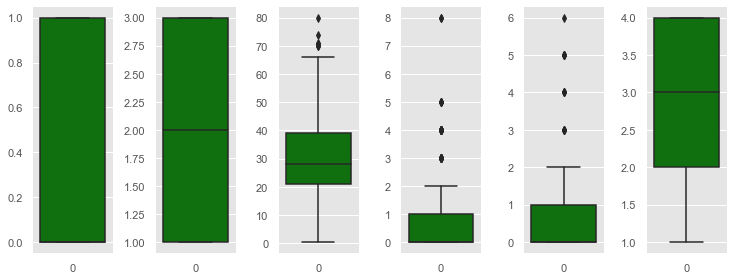

In [27]:
#harus ada data, dan x
features = nums
plt.figure(figsize=(12,4))
for i in range(0, len(features)):
  plt.subplot(1, 7, i+1)
  sns.boxplot(data = training[features[i]], color='green', orient='v') #harus ada keyword
  plt.tight_layout()

- 

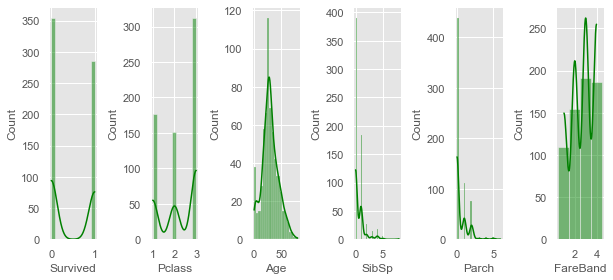

In [28]:
features = nums
plt.figure(figsize=(10,4))
for i in range(0, len(features)):
  plt.subplot(1, 7, i+1)
  #sns.distplot(training[features[i]], color='green') 
  sns.histplot(data=training[features[i]], color='green', kde=True)
  plt.tight_layout()

<AxesSubplot:>

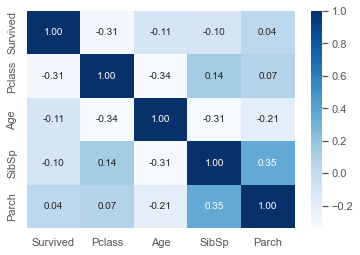

In [29]:
sns.heatmap(training.corr(), cmap='Blues', annot=True, fmt='.2f')

## Distribusi data penumpang yang selamat berdasarkan Gender, Umur, Keberangkatan

In [30]:
training.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     73
          male      281
1         female    190
          male       96
Name: Survived, dtype: int64

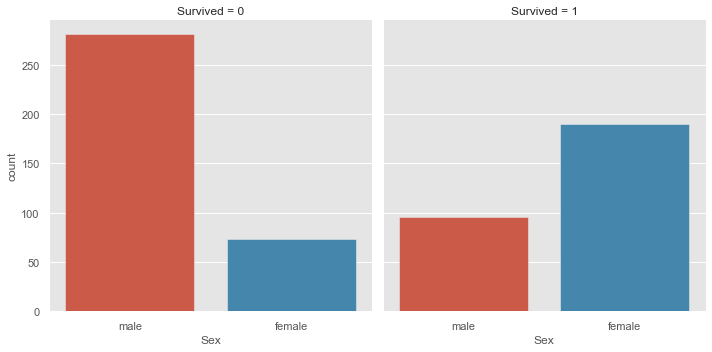

In [31]:
sns.catplot(x='Sex', col='Survived', kind='count', data=training)

Penumpang yang tidak selamat:
- Lebih banyak Pria daripada Wanita 

Penumpang yang selamat:
- Lebih banyak Wanita daripada Pria 

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


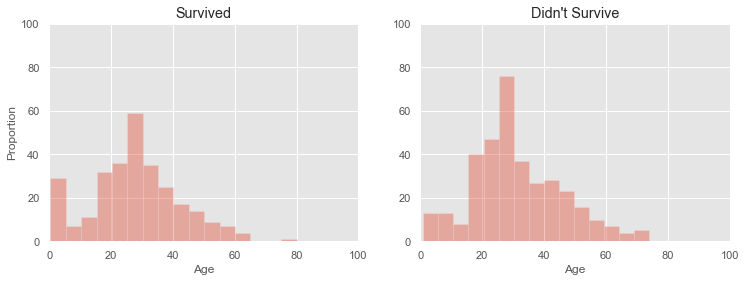

In [32]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

Penumpang yang tidak selamat:
- Distribusi penumpang yang selamat paling banyak rentang usia diatas 30 Tahun

Penumpang yang selamat:
- Distribusi penumpang yang selamat paling banyak rentang usia 20-30

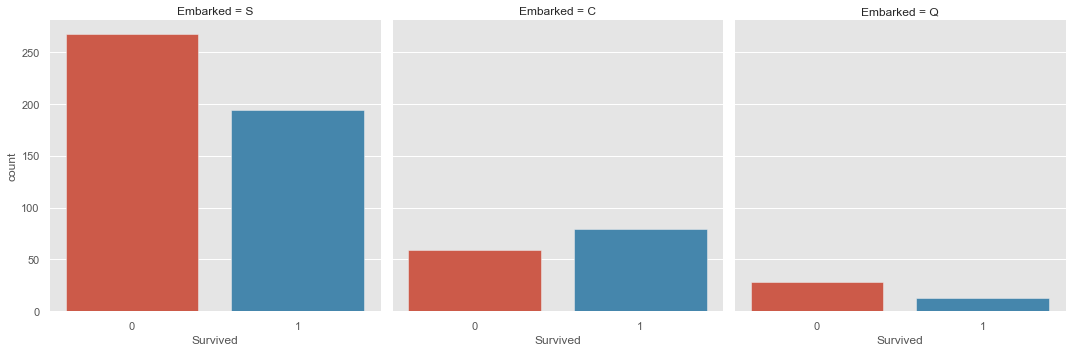

In [33]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=training)

- Keberangkatan dari Southampton merupakan yang paling banyak penumpang yang selamat dan tidak selamat

Pclass      1   2    3
Survived              
0          63  71  220
1         114  80   92


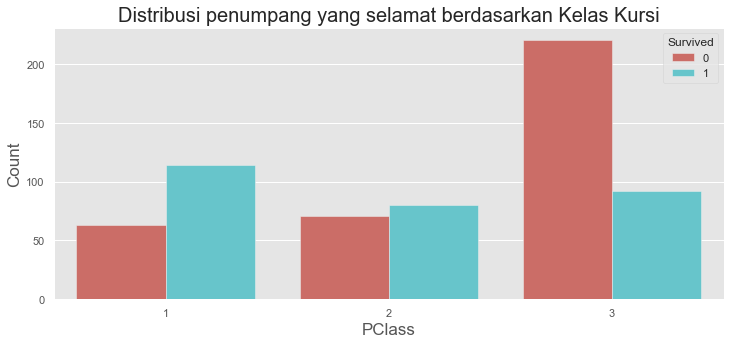

In [34]:
# Exploring Survivors vs Pclass
print(pd.crosstab(training.Survived, training.Pclass))

plt.figure(figsize=(12,5))

sns.countplot(x="Pclass", data=training, hue="Survived",palette="hls")
plt.xlabel('PClass',fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.title('Distribusi penumpang yang selamat berdasarkan Kelas Kursi', fontsize=20)

plt.show()

- Penumpang yang paling banyak selamat berada di kelas 1 
- Penumpang yang tidak selamat terbanyak berada di kelas 3  

# Data Preprocessing

In [35]:
#melabeli setiap data pada kolom
le = LabelEncoder()
def tryLabelEncoder(train):
    for c in train.columns:
        if train.dtypes[c]== object:
            le.fit(train[c].astype(str))
            train[c]=le.transform(train[c].astype(str))
    return train

In [36]:
train = tryLabelEncoder(training)
test = tryLabelEncoder(testing)
print(train,'\n\n')
print(test)

     Survived  Pclass  Sex   Age  SibSp  Parch  Embarked FareBand
0           0       3    1  22.0      1      0         2        1
1           1       1    0  38.0      1      0         0        4
2           1       3    0  26.0      0      0         2        2
3           1       1    0  35.0      1      0         2        4
4           0       3    1  35.0      0      0         2        2
..        ...     ...  ...   ...    ...    ...       ...      ...
885         0       3    0  39.0      0      5         1        3
887         1       1    0  19.0      0      0         2        3
888         0       3    0  28.0      1      2         2        3
889         1       1    1  26.0      0      0         0        3
890         0       3    1  32.0      0      0         1        1

[640 rows x 8 columns] 


     Pclass  Sex   Age  SibSp  Parch  Embarked FareBand
0         3    1  34.5      0      0         1        1
1         3    0  47.0      1      0         2        1
2         2  

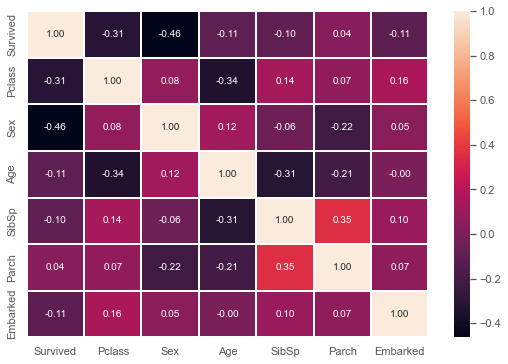

In [37]:
corr = train.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

- Survived & Parch berkorelasi positif 
- Survived & Sex berkorelasi negatif
- Survived & Pclass berkorelasi negatif
- SibSp & Parch berkorelasi positif

# Pendefinisian Model


Prediksi orang yang selamat dari kecelakaan kapal Titanic dengan mengklasifikasikan dengan menggunakan 2 kelas:
- kelas 0 = Tidak Selamat
- kelas 1 = Selamat

Menggunakan 3 Model Algoritma Machine Learning:
- Support Vector Machines
- Random Forest Classifier
- Naive Bayes



In [38]:
scaler = StandardScaler()

# for df_train_ml
scaler.fit(train.drop('Survived',axis=1))
scaled_features = scaler.transform(train.drop('Survived',axis=1))
train_sc = pd.DataFrame(scaled_features, columns=train.columns[:-1])

# for df_test_ml
test.fillna(test.mean(), inplace=True)
# scaler.fit(df_test_ml)
scaled_features = scaler.transform(test)
test_sc = pd.DataFrame(scaled_features, columns=test.columns)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_9316/2069681767.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.mean(), inplace=True)


##  Mendefinisikan Features dalam Data Train & Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(train_sc, train['Survived'], test_size=0.30, random_state=101)

- Membagi dataset menjadi data latih 70% dan data testing 30% dengan train_test_split
* X_train: Untuk menampung data source/features yang akan dilatih
* X_test: Untuk menampung data target yang akan dilatih
* y_train: Untuk menampung data source/features yang akan digunakan untuk testing
* y_test: Untuk menampung data target yang akan digunakan untuk testing

In [40]:
X_train_all = train.drop('Survived',axis=1)
y_train_all = train['Survived']
X_test_all = test

# scaled
X_train_all_sc = train_sc
y_train_all_sc = train['Survived']
X_test_all_sc = test_sc

# Pelatihan Model

## Algoritma Support Vector Machine

In [41]:
#SVM
svc = SVC(gamma = 0.01, C = 100)#, probability=True)
svc.fit(X_train_sc, y_train_sc)

SVC(C=100, gamma=0.01)

In [42]:
pred_svc = svc.predict(X_test_sc)
SVM_acc = accuracy_score(y_test_sc, pred_svc)
print(confusion_matrix(y_test_sc, pred_svc))
print(classification_report(y_test_sc, pred_svc))
print(accuracy_score(y_test_sc, pred_svc))

[[86 23]
 [22 61]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       109
           1       0.73      0.73      0.73        83

    accuracy                           0.77       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.77      0.77      0.77       192

0.765625


## Algoritma Naive Bayes Classifier

In [43]:
#NBC
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)
NBC_acc = accuracy_score(y_test, pred_gnb)
print(confusion_matrix(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))
print(accuracy_score(y_test, pred_gnb))

[[77 32]
 [18 65]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.75       109
           1       0.67      0.78      0.72        83

    accuracy                           0.74       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.75      0.74      0.74       192

0.7395833333333334


## Algoritma Random Forest Classifier

In [44]:
#Random Forest
rfc = RandomForestClassifier(max_depth=6, max_features=7)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=7)

In [45]:
pred_rfc = rfc.predict(X_test)
RF_acc = accuracy_score(y_test, pred_rfc)
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))
print(accuracy_score(y_test, pred_rfc))

[[85 24]
 [22 61]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79       109
           1       0.72      0.73      0.73        83

    accuracy                           0.76       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.76      0.76      0.76       192

0.7604166666666666


# Evaluasi
Menilai seberapa akurat pengklasifikasi atau model dapat memprediksi penumpang yang selamat

In [46]:
print('SVM           = ', SVM_acc)
print('Random Forest = ', RF_acc)
print('Naive Bayes   = ', NBC_acc)


SVM           =  0.765625
Random Forest =  0.7604166666666666
Naive Bayes   =  0.7395833333333334


- Pada percobaan menggunakan 3 algoritma di atas menghasilkan bahwa **Algoritma Support Vector Machine** memiliki **nilai akurasi yang paling tinggi**, yaitu **76.56%** dibanding algoritma yang lainnya.

## Memvisualisasikan confusion matrix 

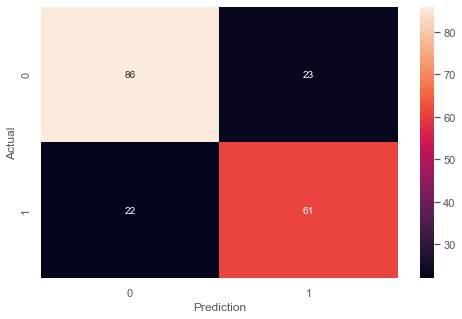

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       109
           1       0.73      0.73      0.73        83

    accuracy                           0.77       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.77      0.77      0.77       192



In [47]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_sc, pred_svc), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test_sc, pred_svc))

- Confusion matrix dapat mengetahui keakuratan dari model yang kita buat dengan performance metrics seperti: accuracy, recall, dan precision.

## Data lengkap hasil prediksi

In [48]:
# Simpan File
svc.fit(X_train_all_sc, y_train_all_sc)
pred_all_svc = svc.predict(X_test_all_sc)

predict_data = tst
predict_data['Survived'] = pd.DataFrame(pred_all_svc)
predict_data.to_csv('predict_data_testing.csv',index=False)
predict_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1.0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0.0


## Conclusion

- Proses EDA sangat penting karena memberi dampak yang kuat dari fitur-fitur seperti Jenis Kelamin, Usia, Keberangkatan pada target
- Dari 3 percobaan yang dilakukan dengan menggunakan Algoritma Support Vector Machine, Naive Bayes, dan Random Forest menghasilkan Algoritma SVM memiliki nilai akurasi yang paling tinggi, yaitu 76,56 %
